In [380]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-data/Titanic.csv


In [381]:
df = pd.read_csv('/kaggle/input/titanic-data/Titanic.csv')

In [382]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [384]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

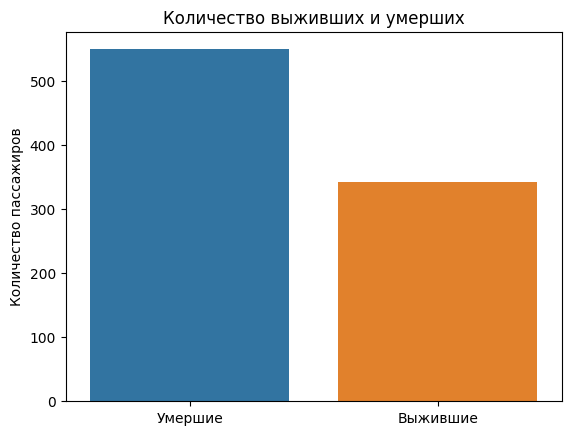

In [385]:
# Количество выживших и умерших пассажиров

# Строим столбчатую диаграмму
survival_counts = df['Survived'].value_counts()

sns.barplot(x=survival_counts.index, y=survival_counts.values)

# Добавляем название диаграммы, осей X и Y
plt.title('Количество выживших и умерших')
plt.xlabel('')
plt.ylabel('Количество пассажиров')

plt.xticks([0, 1], ['Умершие', 'Выжившие'])
plt.show()

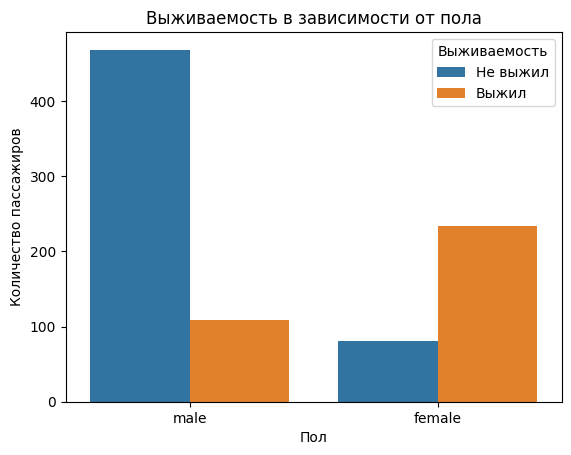

In [386]:
# Зависимость выживаемости от пола пассажира

# Строим столбчатую диаграмму по полу, разделяя на категории выжил/не выжил
sns.countplot(data=df, x='Sex', hue='Survived')

# Добавляем название диаграммы, осей X и Y
plt.title('Выживаемость в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')

# Добавляем информацию в легенде диаграммы
plt.legend(title='Выживаемость', loc='upper right', labels=['Не выжил', 'Выжил'])
plt.show()

Вывод по графику: шанс выжить у мужчин гораздо ниже, чем у женщин. Соответственно количество женщин, которые выжили сильно превосходит количество мужчин

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

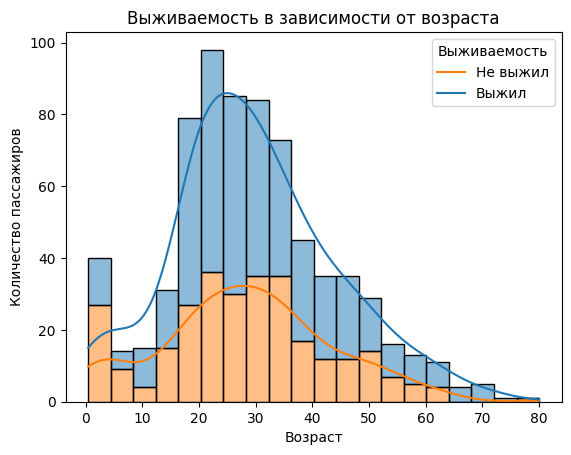

In [387]:
# Зависимость выживаемости от возраста пассажира

# Строим столбчатую диаграмму по возрасту, разделяя на категории выжил/не выжил, также указываем что категории накладываются друг на друга
# Добавляем график оценки плотности
sns.histplot(df, x='Age', hue='Survived', kde=True, multiple='stack')

# Добавляем название диаграммы, осей X и Y
plt.title('Выживаемость в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')

# Добавляем информацию в легенде диаграммы
plt.legend(title='Выживаемость', labels=['Не выжил', 'Выжил'])
plt.show()

Вывод по графику: выживаемость молодых пассажиров в возрасте 20-40 лет самая высокая, следовательно у такой возрастной группы более высокий шанс на выживаемость

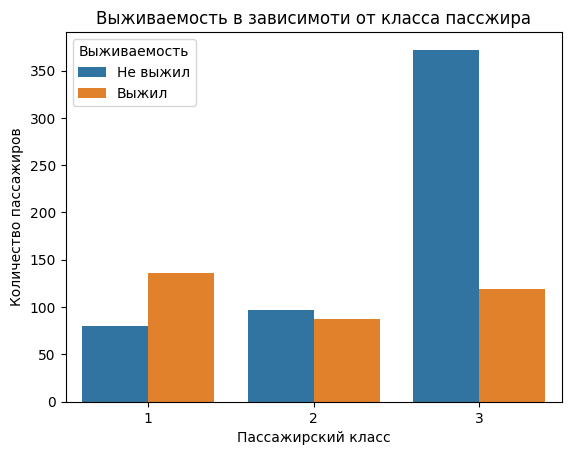

In [388]:
# Зависимость выживаемости от класса пассажира

# Строим столбчатую диаграмму по пассажирскому классу, разделяя на категории выжил/не выжил
sns.countplot(data=df, x='Pclass', hue='Survived')

# Добавляем название диаграммы, осей X и Y
plt.title('Выживаемость в зависимоти от класса пассжира')
plt.xlabel('Пассажирский класс')
plt.ylabel('Количество пассажиров')

# Добавляем информацию в легенде диаграммы
plt.legend(title='Выживаемость', labels=['Не выжил', 'Выжил'])
plt.show()

Вывод по графику: у пассажиров в первом классе самый большой шанс выжить, количество выживших в нём превосходит умерших. Во втором классе количество не выживших немного превосходит. В третьем классе количество не выживших сильно превосходит выживших. Следовательно, чтобы повысить вероятность выжить нужно находиться в первом классе. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

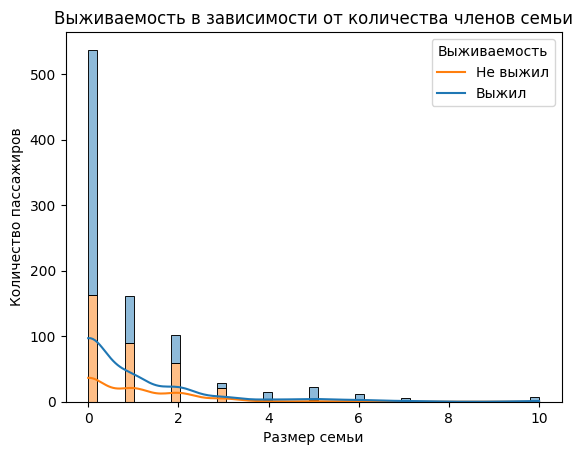

In [389]:
# Зависимость выживаемости от количества членов семьи

# Создание нового столбца: размер семьи
df['FamilySize'] = df['SibSp'] + df['Parch']

# Строим столбчатую диаграмму по размеру семьи, разделяя на категории выжил/не выжил, также указываем что категории накладываются друг на друга
# Добавляем график оценки плотности
sns.histplot(df, x='FamilySize', hue='Survived', kde=True, multiple='stack')

# Добавляем название диаграммы, осей X и Y
plt.title('Выживаемость в зависимости от количества членов семьи')
plt.xlabel('Размер семьи')
plt.ylabel('Количество пассажиров')

# Добавляем информацию в легенде диаграммы
plt.legend(title='Выживаемость', labels=['Не выжил', 'Выжил'])
plt.show()

Вывод по графику: пассажиры с небольшими семьями имели более высокий шанс выжить.

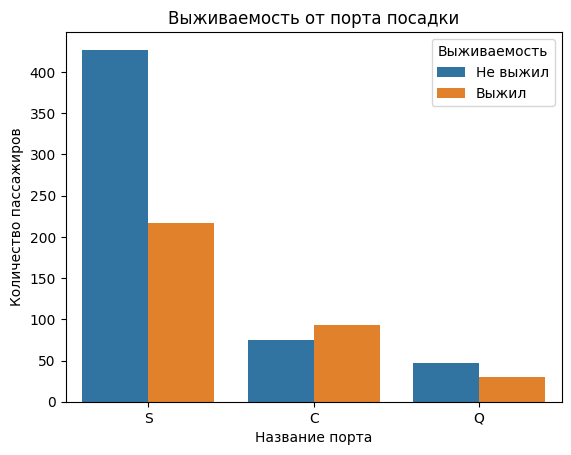

In [390]:
# Выживаемость в зависимости от порта, в котором сел пассажир

# Строим столбчатую диаграмму по порту, разделяя на категории выжил/не выжил
sns.countplot(data=df, x='Embarked', hue='Survived')

# Добавляем название диаграммы, осей X и Y
plt.title('Выживаемость от порта посадки')
plt.xlabel('Название порта')
plt.ylabel('Количество пассажиров')

# Добавляем информацию в легенде диаграммы
plt.legend(title='Выживаемость', labels=['Не выжил', 'Выжил'])
plt.show()

In [391]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

Вывод по графику: самая высокая выживаемость у пассажиров, которые сели в порту C.

In [392]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [394]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [395]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2,1
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,1
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2,0
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,1
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2,0
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2,0
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2,3
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0,0


In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 90.6 KB


In [397]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
FamilySize       0
dtype: int64

In [398]:
df['Age'].fillna(df['Age'].median(),inplace=True)

/tmp/ipykernel_30/1527141296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [399]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
dtype: int64

In [401]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [402]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [403]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [404]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517,0.016639
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112,0.065997
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557,-0.036309
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057,-0.200988
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.014205,-0.245619
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654,0.890712
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322,0.783111
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041,0.064302
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226,0.217138


In [414]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.7))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3913 - loss: 1.1937 - val_accuracy: 0.4224 - val_loss: 0.7057
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4337 - loss: 0.8964 - val_accuracy: 0.6335 - val_loss: 0.6654
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5834 - loss: 0.7317 - val_accuracy: 0.6460 - val_loss: 0.6470
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5465 - loss: 0.7058 - val_accuracy: 0.6460 - val_loss: 0.6353
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5846 - loss: 0.6863 - val_accuracy: 0.6460 - val_loss: 0.6267
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6139 - loss: 0.6600 - val_accuracy: 0.6460 - val_loss: 0.6202
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6118 - loss: 0.6662 - val_accuracy: 0.6460 - val_loss: 0.6140
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6517 - loss: 0.6622 - val_accuracy: 0.6460 - val_loss: 0.6066
Ep

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8073 - loss: 0.4556 - val_accuracy: 0.8012 - val_loss: 0.4517
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7911 - loss: 0.4724 - val_accuracy: 0.8012 - val_loss: 0.4535
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8040 - loss: 0.4359 - val_accuracy: 0.7888 - val_loss: 0.4464
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8174 - loss: 0.4842 - val_accuracy: 0.7826 - val_loss: 0.4468
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8190 - loss: 0.4243 - val_accuracy: 0.7950 - val_loss: 0.4389
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7968 - loss: 0.4597 - val_accuracy: 0.8075 - val_loss: 0.4338
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8051 - loss: 0.4401 - val_accuracy: 0.8075 - val_loss: 0.4330
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8151 - loss: 0.4350 - val_accuracy: 0.8075 - val_loss:

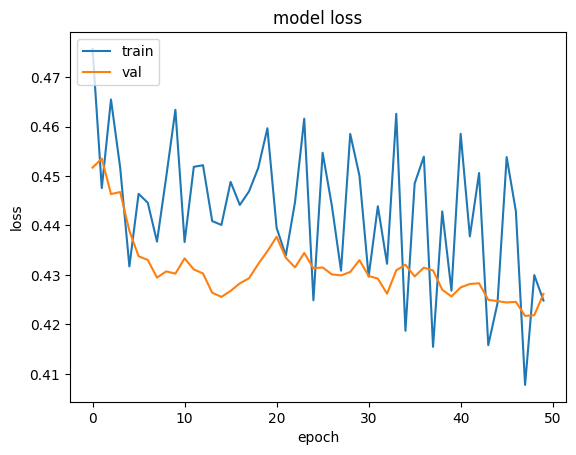

In [419]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()